# Capstone Project - DermaSeer

After performing the dataset processing stage, the next step is the modeling process. Where the data used to build the model is training data stored in the normalization-train folder, validation data stored in the normalization-validation folder, and testing data stored in the test folder.

# 1. Import Library

In [211]:
import os # handles operating system-related tasks like file and directory operations
import shutil # provides functions to copy, move, and delete files or directories
from collections import defaultdict # creates dictionaries with default values
from tensorflow.keras import layers, models # defines neural network layers for deep learning models, constructs and manages neural network models
from tensorflow.keras.optimizers import RMSprop # applies the rmsprop optimization algorithm for training
from tensorflow.keras.callbacks import LearningRateScheduler # dynamically adjusts the learning rate during training
from tensorflow.keras import regularizers # adds regularization to model layers to reduce overfitting
from tensorflow.keras.preprocessing.image import ImageDataGenerator # generates batches of tensor image data with real-time data augmentation
import matplotlib.pyplot as plt # visualizes data with plots, graphs, and chart
from tensorflow.keras.applications import InceptionV3 # imports the pre-trained InceptionV3 model for image classification tasks, enabling transfer learning or feature extraction
import numpy as np # used for array manipulation and numerical operations
from tensorflow.keras.preprocessing import image # provides functions to load, preprocess, and convert images into the appropriate format for deep learning models
import ipywidgets as widgets # provides interactive widgets 
from IPython.display import display, Image, clear_output # allows displaying images and outputs
from tensorflow.keras.models import load_model # loads a pre-trained model from a file

# 2. Fireplace Folder Dataset

At this stage, copies folders from "normalization-images" (e.g., normalization-train, normalization-validation) to new folders (data-train, data-validation) using shutil.copytree(). It also consolidates files from subfolders in the "test" folder into a single "data-test" folder for easier data access during modeling.

Befotre: 
<pre>
normalization-images/
├── normalization-train/
│   ├── file1.jpg
│   ├── file2.jpg
│   └── ...
├── normalization-validation/
│   ├── file3.jpg
│   ├── file4.jpg
│   └── ...
test/
├── subfolder1/
│   ├── file5.jpg
│   ├── file6.jpg
│   └── ...
├── subfolder2/
│   ├── file7.jpg
│   ├── file8.jpg
│   └── ...
</pre>

After:
<pre>
current_directory/
├── data-train/
│   ├── file1.jpg
│   ├── file2.jpg
│   └── ...
├── data-validation/
│   ├── file3.jpg
│   ├── file4.jpg
│   └── ...
├── data-test/
│   ├── file5.jpg
│   ├── file6.jpg
│   ├── file7.jpg
│   ├── file8.jpg
│   └── ...
</pre>

In [216]:
# specify source folder path and destination
source_folder = 'normalization-images'  # source folder
destination = '.'  # destination directory (current directory)

# folders to copy and their corresponding destination names
folders_to_copy = {
    'normalization-train': 'data-train', 
    'normalization-validation': 'data-validation'
}

# copy each folder
for source_folder_name, dest_folder_name in folders_to_copy.items():
    source_path = os.path.join(source_folder, source_folder_name)
    destination_path = os.path.join(destination, dest_folder_name)
    
    # copy the folder
    if os.path.exists(source_path):
        shutil.copytree(source_path, destination_path)
        print(f"Folder {source_folder_name} Has Been Copied To {destination_path}")
    else:
        print(f"Folder {source_folder_name} Not Found In {source_folder}")

Folder normalization-train Has Been Copied To ./data-train
Folder normalization-validation Has Been Copied To ./data-validation


In [217]:
# specify the source and destination folders
source_folder = 'test'  # the folder containing subfolders
destination = 'data-test'  # the folder where data should be copied

# create the destination folder if it doesn't exist
if not os.path.exists(destination):
    os.makedirs(destination)

# loop through all subfolders in the source folder
for subfolder in os.listdir(source_folder):
    subfolder_path = os.path.join(source_folder, subfolder)
    
    # check if it's a folder
    if os.path.isdir(subfolder_path):
        # loop through all files in the subfolder
        for file in os.listdir(subfolder_path):
            file_path = os.path.join(subfolder_path, file)
            
            # check if it's a file and copy it to the destination folder
            if os.path.isfile(file_path):
                destination_path = os.path.join(destination, file)
                shutil.copy(file_path, destination_path)

# print 'All Completed' after all files have been processed
print("All Completed")

All Completed


# 3. Labelling Dataset

At this stage, processes image data stored in data-train, data-validation, and data-test folders by categorizing images based on labels in their filenames. It groups images by label into a dictionary and moves each image to the corresponding label subfolder. If a label subfolder doesn't exist, it is created.

In [222]:
# specify dataset folders (folders are in the same directory as the script)
folders = ['data-train', 'data-validation', 'data-test']

# dictionary to store images by class
class_dict = defaultdict(list)

# process each dataset folder
for folder in folders:
    # path directly to the folder that is in the same directory as the script
    folder_path = folder  # since the folder is already in the same directory, just use the folder name directly
    
    # process each image in the folder
    for image in os.listdir(folder_path):
        if image.endswith(('.jpg', '.JPG', '.png', '.jfif')):  # only process image files
            # get the text after the last underscore
            label_part = image.split('_')[-1]
            
            # check if the second character is a digit, if so, take only the first character
            if len(label_part) > 1 and label_part[1].isdigit():
                label = label_part[0]  # only take the first character
            else:
                label = label_part[:2]  # take the first two characters if both are letters
            
            # store the image in the dictionary by label and folder
            class_dict[label].append(os.path.join(folder, image))

# generate the class_dict to check the labeling result
# print the dictionary to see the images by label
for label, images in class_dict.items():
    print(f"Label: {label}")
    print(f"Number of images: {len(images)}")
    print("Image paths:")
    for img in images:
        print(f"  - {img}")
    print("-" * 50)

Label: f
Number of images: 318
Image paths:
  - data-train/Normalized_Augmented_3_resized_f48.JPG
  - data-train/Normalized_Augmented_4_resized_f70.JPG
  - data-train/Normalized_Augmented_4_resized_f64.JPG
  - data-train/Normalized_Augmented_4_resized_f58.JPG
  - data-train/Normalized_Augmented_0_resized_f31.JPG
  - data-train/Normalized_Augmented_0_resized_f25.JPG
  - data-train/Normalized_Augmented_3_resized_f3.JPG
  - data-train/Normalized_Augmented_2_resized_f11.JPG
  - data-train/Normalized_Augmented_2_resized_f7.JPG
  - data-train/Normalized_Augmented_1_resized_f54.JPG
  - data-train/Normalized_Augmented_1_resized_f69.JPG
  - data-train/Normalized_Augmented_2_resized_f10.JPG
  - data-train/Normalized_Augmented_2_resized_f38.JPG
  - data-train/Normalized_Augmented_3_resized_f2.JPG
  - data-train/Normalized_Augmented_0_resized_f30.JPG
  - data-train/Normalized_Augmented_4_resized_f59.JPG
  - data-train/Normalized_Augmented_3_resized_f61.JPG
  - data-train/Normalized_Augmented_4_res

In [224]:
# specify dataset folders (folders are in the same directory as the script)
folders = ['data-train', 'data-validation', 'data-test']

# dictionary to store images by class
class_dict = defaultdict(list)

# process each dataset folder
for folder in folders:
    folder_path = folder  # since the folder is already in the same directory, just use the folder name directly
    
    # process each image in the folder
    for image in os.listdir(folder_path):
        if image.endswith(('.jpg', '.JPG', '.png', '.jfif')):  # only process image files
            # get the text after the last underscore
            label_part = image.split('_')[-1]
            
            # check if the second character is a digit, if so, take only the first character
            if len(label_part) > 1 and label_part[1].isdigit():
                label = label_part[0]  # only take the first character
            else:
                label = label_part[:2]  # take the first two characters if both are letters
            
            # add the image to the class_dict
            class_dict[label].append(os.path.join(folder, image))

# now, move the images into their respective label folders
for label, images in class_dict.items():
    for folder in folders:
        # create label directory inside each folder if it doesn't exist
        label_folder_path = os.path.join(folder, label)
        if not os.path.exists(label_folder_path):
            os.makedirs(label_folder_path)

        # move each image to the corresponding label folder
        for image_path in images:
            # check if the image is in the current folder being processed
            if image_path.startswith(folder):
                # move the image to the label folder inside the dataset folder
                image_name = os.path.basename(image_path)
                destination_path = os.path.join(label_folder_path, image_name)
                shutil.move(image_path, destination_path)
                print(f"Moved {image_name} to {label_folder_path}")

# print to verify the labeling and the move operation
for folder in folders:
    print(f"\nContents of {folder}:")
    for label in os.listdir(folder):
        label_folder_path = os.path.join(folder, label)
        if os.path.isdir(label_folder_path):
            print(f"  {label}: {len(os.listdir(label_folder_path))} images")

Moved Normalized_Augmented_3_resized_f48.JPG to data-train/f
Moved Normalized_Augmented_4_resized_f70.JPG to data-train/f
Moved Normalized_Augmented_4_resized_f64.JPG to data-train/f
Moved Normalized_Augmented_4_resized_f58.JPG to data-train/f
Moved Normalized_Augmented_0_resized_f31.JPG to data-train/f
Moved Normalized_Augmented_0_resized_f25.JPG to data-train/f
Moved Normalized_Augmented_3_resized_f3.JPG to data-train/f
Moved Normalized_Augmented_2_resized_f11.JPG to data-train/f
Moved Normalized_Augmented_2_resized_f7.JPG to data-train/f
Moved Normalized_Augmented_1_resized_f54.JPG to data-train/f
Moved Normalized_Augmented_1_resized_f69.JPG to data-train/f
Moved Normalized_Augmented_2_resized_f10.JPG to data-train/f
Moved Normalized_Augmented_2_resized_f38.JPG to data-train/f
Moved Normalized_Augmented_3_resized_f2.JPG to data-train/f
Moved Normalized_Augmented_0_resized_f30.JPG to data-train/f
Moved Normalized_Augmented_4_resized_f59.JPG to data-train/f
Moved Normalized_Augmented_

#  4. Modelling Data CNN with Mobile-Net Transfer Learning

At this stage, code sets up a deep CNN for image classification using images from data-train, data-validation, and data-test. It builds a CNN with five convolutional layers, batch normalization, max pooling, and a fully connected layer with regularization. The model is compiled with RMSprop, trained for 50 epochs, and evaluated on the test set. Accuracy and loss are plotted, and the trained model is saved for future use.

**A. Data Preparation and Generator Setup**

The code sets up a data generator for training, validation, and testing in image classification tasks. This generator facilitates efficient loading and grouping of image data for model training, validation, and testing.

In [230]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data generator for training with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data generator for validation and test without augmentation
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Data generators for train, validation, and test datasets
train_generator = train_datagen.flow_from_directory(
    'data-train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    'data-validation',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    'data-test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 1100 images belonging to 5 classes.
Found 425 images belonging to 5 classes.
Found 40 images belonging to 5 classes.


**B. CNN Model Architecture**

The code defines a CNN model using transfer learning with a pre-trained InceptionV3 model. It freezes the initial layers, fine-tunes the last 50 layers, and adds a global average pooling layer, two fully connected layers with L2 regularization, Batch Normalization, and Dropout. The output layer uses softmax for multi-class classification, and a learning rate scheduler halves the learning rate every 15 epochs.

In [234]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

# Load MobileNet model pre-trained on ImageNet, exclude top layers
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers except the last 30
for layer in base_model.layers[:-30]:
    layer.trainable = False

# Build model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(train_generator.num_classes, activation='softmax')  # Output layer
])

**C. Model Compilation and Training**

The code compiles and trains a deep learning model using the RMSprop optimizer with a learning rate of 0.0005, categorical cross-entropy loss, and accuracy as the metric. It trains for 50 epochs using data from `train_generator` and `val_generator`, applying a `LearningRateScheduler` to halve the learning rate after 15 epochs. The model is based on a pre-trained InceptionV3, fine-tuned with transfer learning, and frozen layers for improved training efficiency.

In [238]:
# print the model summary (optional)
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional) │ (None, 7, 7, 1024)     │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_7      │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,360,709 (12.82 MB)

 Trainable params: 2,527,493 (9.64 MB)

 Non-trainable params: 833,216 (3.18 MB)

In [240]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Compile model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6
)

# Train model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 40s 968ms/step - accuracy: 0.3016 - loss: 1.7895 - val_accuracy: 0.2753 - val_loss: 3.3611 - learning_rate: 1.0000e-04
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 34s 917ms/step - accuracy: 0.5727 - loss: 1.1117 - val_accuracy: 0.2894 - val_loss: 2.8359 - learning_rate: 1.0000e-04
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 35s 949ms/step - accuracy: 0.6187 - loss: 0.9614 - val_accuracy: 0.3482 - val_loss: 2.3626 - learning_rate: 1.0000e-04
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 35s 929ms/step - accuracy: 0.6910 - loss: 0.8196 - val_accuracy: 0.4471 - val_loss: 1.7753 - learning_rate: 1.0000e-04
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 35s 935ms/step - accuracy: 0.7272 - loss: 0.7789 - val_accuracy: 0.4541 - val_loss: 1.6964 - learning_rate: 1.0000e-04
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 35s 949ms/step - accuracy: 0.7373 - loss: 0.7145 - val_accuracy: 0.5553 - val_loss: 1.3018 - learning_rate: 1.0000e-04
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 35s 960ms/step - acc

**D. Plotting Model Accuracy and Loss**

The code visualizes the model's training progress by plotting accuracy and loss for both training and validation datasets across epochs, helping to assess model performance and generalization.

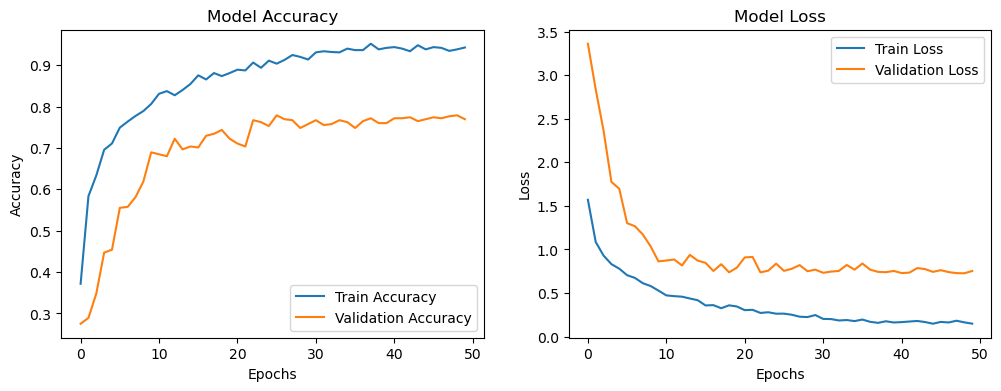

In [244]:
# plot accuracy and loss
plt.figure(figsize=(12, 4))

# plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

**E. Model Evaluation on Test Data**

The code evaluates the trained model on the test data and prints the test accuracy as a percentage, helping to assess the model's performance on unseen data.

In [248]:
# evaluate the model on the test data
test_loss, test_acc = model.evaluate(
    test_generator,
    steps=test_generator.samples // test_generator.batch_size
)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step - accuracy: 0.8750 - loss: 0.3622
Test Accuracy: 87.50%


**F. Model Evaluation Summary**

The code prints a summary of the model's performance, showing the final training accuracy, validation accuracy, and test accuracy as percentages, providing an overview of how well the model performed during training and on unseen data.

In [250]:
# summary of model evaluation
print("\nModel Evaluation Summary:")
print(f"Final Train Accuracy: {history.history['accuracy'][-1] * 100:.2f}%")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1] * 100:.2f}%")
print(f"Final Test Accuracy: {test_acc * 100:.2f}%")


Model Evaluation Summary:
Final Train Accuracy: 94.27%
Final Validation Accuracy: 76.94%
Final Test Accuracy: 87.50%


**G. Saving Model**

The code saves the trained model to a file named 'model-dermaseer.keras' and prints a confirmation message to indicate the model has been successfully saved.

In [252]:
# Save the model to a file using Keras
model.save('model-dermaseer.keras')

# Print a message to confirm the model has been saved successfully
print("Model has been saved as 'model-dermaseer.keras' using Keras")

Model has been saved as 'model-dermaseer.keras' using Keras


# 5. Prediction

At this stage, the acne type prediction process is carried out using the trained model. The code defines a function `predict_acne_type` to preprocess the uploaded image, make predictions, and display the results along with probabilities for each acne type. The code uses `ipywidgets` to create a simple interactive file upload widget where users can upload images. Once uploaded, the image is processed, predictions are made, and the results are displayed.

In [256]:
# check class indices after creating the train_generator
print("Class indices:", train_generator.class_indices)

Class indices: {'f': 0, 'fu': 1, 'n': 2, 'p': 3, 'pa': 4}


In [258]:
# mapping class from index to class name
class_indices = {0: 'f', 1: 'fu', 2: 'n', 3: 'p', 4: 'pa'}

def predict_acne_type(img_path, model):
    # load and preprocess the image
    img = image.load_img(img_path, target_size=(150, 150))  # size should match the model input size
    img_array = image.img_to_array(img)  # convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # add batch dimension
    img_array /= 255.0  # normalize according to the scale used during training

    # make predictions
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])  # get the index with the highest probability
    predicted_class_label = class_indices[predicted_class_index]  # convert index to class label

    # print the prediction result
    print(f"Prediction Result: {predicted_class_label} With Probability {predictions[0][predicted_class_index]:.2f}")

In [260]:
# load the trained model
model = load_model('model-dermaseer.keras')  # replace with the path to your model

# mapping class indices
class_indices = {0: 'f', 1: 'fu', 2: 'n', 3: 'p', 4: 'pa'}
class_labels = list(class_indices.values())

# prediction function
def predict_acne_type(img_path, model):
    try:
        # ensure the image size matches the model's input size
        img = image.load_img(img_path, target_size=(224, 224))  # adjust target_size as needed
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0  # normalize to [0, 1]

        predictions = model.predict(img_array)[0]
        predicted_class_index = np.argmax(predictions)
        predicted_class_label = class_indices[predicted_class_index]

        results = {class_labels[i]: float(predictions[i]) for i in range(len(predictions))}
        return predicted_class_label, results
    except Exception as e:
        print(f"Error While Processing Image: {e}")
        return None, {}

# function to handle image upload
def on_upload_change(change):
    if change['new']:
        clear_output(wait=True)
        try:
            # save the uploaded image
            file_content = change['new'][0]['content']
            file_name = change['new'][0]['name']

            with open(file_name, 'wb') as f:
                f.write(file_content)

            # display the uploaded image
            display(Image(file_name))
            
            # make a prediction
            predicted_label, probabilities = predict_acne_type(file_name, model)
            if predicted_label is None:
                print("Failed To Process Image. Please Upload Again.")
                return
            
            # display prediction results
            print(f"Predicted Acne Type: {predicted_label}")
            print("Probabilities:")
            for acne_type, prob in probabilities.items():
                print(f"  {acne_type}: {prob:.2f}")

            # add buttons to continue or delete image
            continue_button = widgets.Button(description="Continue Photo")
            delete_button = widgets.Button(description="Delete Photo")

            # "continue photo" button function
            def on_continue_click(b):
                clear_output(wait=True)
                print("Please Upload Another Photo.")
                display(upload_widget)

            # "delete photo" button function
            def on_delete_click(b):
                os.remove(file_name)
                clear_output(wait=True)
                print(f"Image {file_name} Has Been Deleted. Please Upload A New Photo.")
                display(upload_widget)

            # add button actions
            continue_button.on_click(on_continue_click)
            delete_button.on_click(on_delete_click)

            # display buttons
            display(widgets.HBox([continue_button, delete_button]))

        except Exception as e:
            print(f"An Error Occurred: {e}. Please Upload Again.")

# widget for file upload
upload_widget = widgets.FileUpload(
    accept='image/*',  
    multiple=True  
)

# monitor changes in the widget
upload_widget.observe(on_upload_change, names='value')

# display the widget
display(upload_widget)

FileUpload(value=(), accept='image/*', description='Upload', multiple=True)